In [1]:
from IPython.utils import io
# with io.capture_output() as output_03:
#     %run '03_2d_spectra.ipynb'

In [2]:
with io.capture_output() as output_14:
    %run '14_a_closer_look_at_acceptance.ipynb'

In [2]:
to_dump = ['e_scale', 'fg_0_sub', 'fg_0_sub_err']
dump_dir = '08_ascii_files'

In [3]:
# Dump variable as one list
for var in to_dump:
    with open(dump_dir +'/' + var + '.txt','w') as f:
        for line in eval(var):
            f.write(str(line) + '\n')
            

In [29]:
# For Andreas: mimic his .phs format (more or less)
with open(dump_dir + '/' + 'phs.txt', 'w') as f:
    for e, amp in zip(e_scale, fg_disc_sub):
        string_to_write = '%.6e' % (e/1000) + ' ' + '%.6e' % amp + '\n'
        f.write(string_to_write)
    


<Container object of 3 artists>

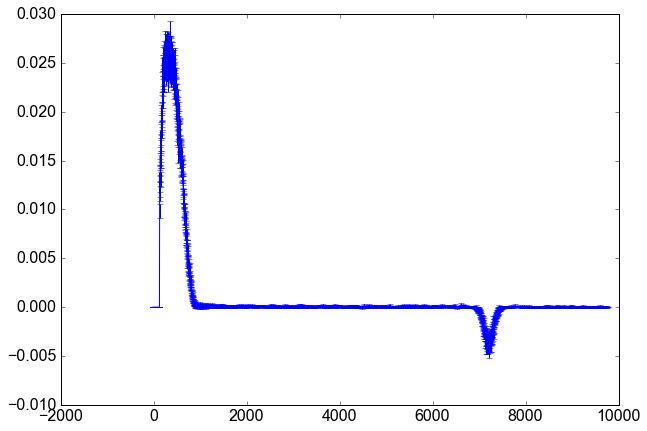

In [4]:
plt.errorbar(e_scale, fg_disc_sub, fg_disc_sub_err)
# plt.xlim(0,200)
# plt.axvline(130)

In [6]:
np.unique(np.diff(e_scale))

array([ 2.3875,  2.3875,  2.3875,  2.3875,  2.3875,  2.3875,  2.3875,
        2.3875,  2.3875,  2.3875,  2.3875,  2.3875,  2.3875,  2.3875,
        2.3875])

In [29]:
e_scale_r = rebin(e_scale, mode='avg') # r for rebin
fg_disc_sub_r = rebin(fg_disc_sub, mode='avg')
fg_disc_sub_err_r = rebin(fg_disc_sub_err, mode='quad_avg')
# Manual calculation with other method confirms the error bars
ehm = np.sqrt(abs(rebin(fg_disc_sub, mode = 'sum') * fg_livetime)) / fg_livetime / 2

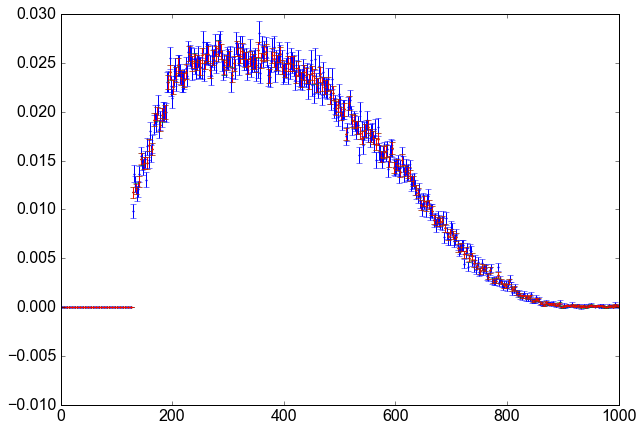

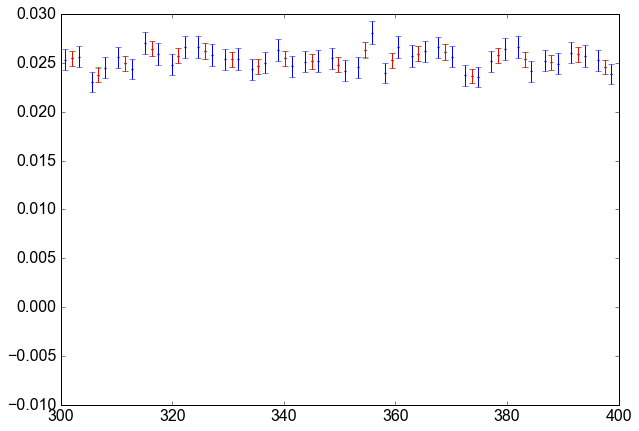

In [31]:
plt.errorbar(e_scale, fg_disc_sub, fg_disc_sub_err, marker='.', markersize=3, ls='None')
plt.errorbar(e_scale_r, fg_disc_sub_r, fg_disc_sub_err_r, marker='.', markersize=3, ls='None')
plt.errorbar(e_scale_r, fg_disc_sub_r, ehm, marker='.', markersize=3, ls='None')
plt.xlim(0,1000)
plt.show()

plt.errorbar(e_scale, fg_disc_sub, fg_disc_sub_err, marker='.', markersize=3, ls='None')
plt.errorbar(e_scale_r, fg_disc_sub_r, fg_disc_sub_err_r, marker='.', markersize=3, ls='None')
plt.errorbar(e_scale_r, fg_disc_sub_r, ehm, marker='.', markersize=3, ls='None')
plt.xlim(300,400)
plt.show()

In [34]:
acc_e_r = rebin(acc_e, mode='avg')

(100, 200)

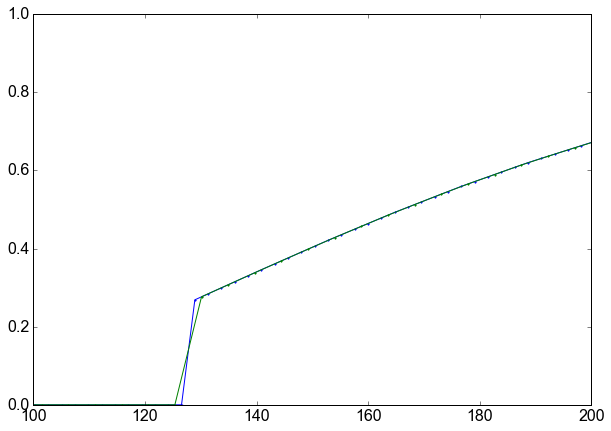

In [39]:
plt.plot(e_scale, acc_e, marker='.', markersize=3)
plt.plot(e_scale_r, acc_e_r, marker='.', markersize=3)
plt.xlim(100,200)

In [40]:
def correct_for_acc(arr, acceptance_array, cutoff = 1e-6):
    assert len(arr) == len(acceptance_array)
    arr_c = []
    for a, acc in zip(arr, acceptance_array):
        if acc < cutoff:
            arr_c.append(0)
        else:
            arr_c.append(a/acc)
    return np.array(arr_c)

In [46]:
fg_disc_sub_r_a = correct_for_acc(fg_disc_sub_r, acc_e_r)
fg_disc_sub_err_r_a = correct_for_acc(fg_disc_sub_err_r, acc_e_r)

(0, 1000)

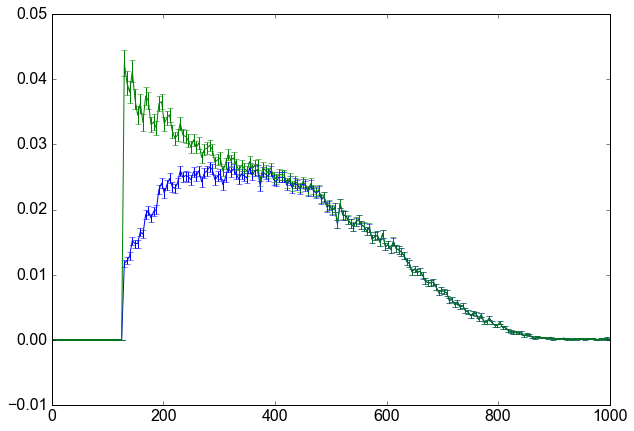

In [48]:
plt.errorbar(e_scale_r, fg_disc_sub_r, fg_disc_sub_err_r)
plt.errorbar(e_scale_r, fg_disc_sub_r_a, fg_disc_sub_err_r_a)
plt.xlim(0,1000)